In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom,norm
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from scipy import linalg

In [ ]:
X=np.random.uniform(0,1,50)
y=np.sin((1+X**2))
noise=norm.rvs(size=50,loc=0,scale=.032)
y_noise=np.sin((1+X**2))+noise


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=33)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X, y_noise, test_size=0.2,random_state=33)

***Plotting The Training and Test Data.***



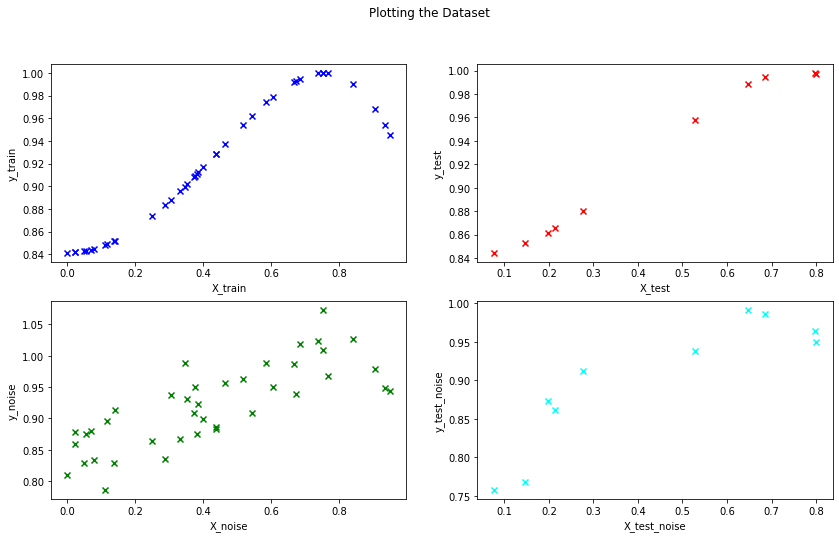

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))


plt.subplot(2, 2,1)
plt.scatter(X_train, y_train, c ="blue", linewidths = 2, marker='x')
plt.xlabel("X_train")
plt.ylabel("y_train")

plt.subplot(2, 2,2)
plt.scatter(X_test, y_test, c ="red", linewidths = 2, marker='x')
plt.xlabel("X_test")
plt.ylabel("y_test")

plt.subplot(2, 2,3)
plt.scatter(X_train_noise, y_train_noise, c ="green", linewidths = 2, marker='x')
plt.xlabel("X_noise")
plt.ylabel("y_noise")

plt.subplot(2, 2,4)
plt.scatter(X_test_noise, y_test_noise, c ="cyan", linewidths = 2, marker='x')
plt.xlabel("X_test_noise")
plt.ylabel("y_test_noise")

fig.suptitle("Plotting the Dataset")

plt.show()

# ***Linear Regression***

In [ ]:
class LinearRegression:
    def fit(self, X, y, lr=0.01, itr=500):
        X = np.concatenate([X, np.ones_like(y)], axis=1)
        rows, cols = X.shape
        if rows >= cols == np.linalg.matrix_rank(X):
            self.weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)),X.transpose()),y)
        
        return self
    
    def predict(self, X):        
        X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        
        if X.shape[1] != self.weights.shape[0]:
            return
        
        return np.matmul(X, self.weights)
    
    def rmse(self, X, y):
        y_hat = self.predict(X)
        
        if y_hat is None:
            return
        
        return np.sqrt(((y_hat - y)**2).mean())

In [ ]:
X_train=X_train.reshape((-1,1))
X_test=X_test.reshape((-1,1))
X_train_noise=X_train_noise.reshape((-1,1))
X_test_noise=X_test_noise.reshape((-1,1))
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))
y_train_noise = y_train_noise.reshape((-1, 1))
y_test_noise = y_test_noise.reshape((-1, 1))

In [ ]:
lr_solve = LinearRegression().fit(X_train, y_train)
print("RMSE for Training Set is:" ,lr_solve.rmse(X_train, y_train))
print("RMSE for Testing Set is:" ,lr_solve.rmse(X_test, y_test))
print("RMSE for Training Set With Noise is:" ,lr_solve.rmse(X_train_noise, y_train_noise))
print("RMSE for Testing Set With Noise isis:" ,lr_solve.rmse(X_test_noise, y_test_noise))

RMSE for Training Set is: 0.021260096320866624
RMSE for Testing Set is: 0.01696703888533923
RMSE for Training Set With Noise is: 0.04078734830419317
RMSE for Testing Set With Noise isis: 0.04782836213756692


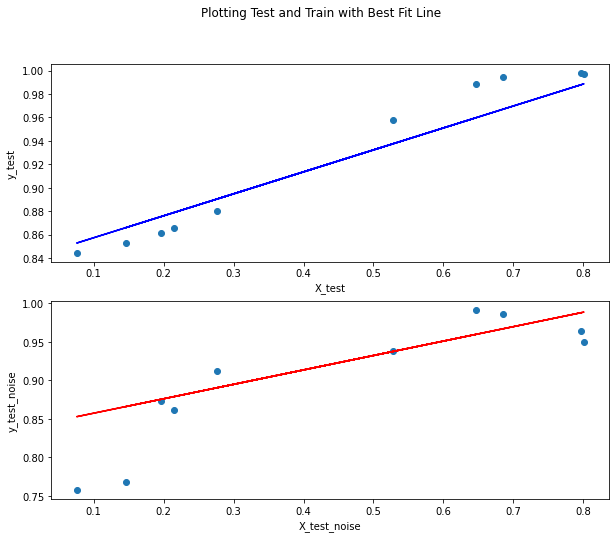

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

plt.subplot(2, 1,1)
plt.scatter(X_test, y_test)
plt.plot(X_test, lr_solve.predict(X_test), color='blue')
plt.xlabel("X_test")
plt.ylabel("y_test")

plt.subplot(2, 1,2)
plt.scatter(X_test_noise, y_test_noise)
plt.plot(X_test_noise, lr_solve.predict(X_test_noise), color='red')
plt.xlabel("X_test_noise")
plt.ylabel("y_test_noise")

fig.suptitle("Plotting Test and Train with Best Fit Line")
plt.show()

# ***Polynomial Regression***

In [ ]:
X=np.random.uniform(0,1,50)
y=np.sin((1+X**2))
noise=norm.rvs(size=50,loc=0,scale=.032)
y_noise=np.sin((1+X**2))+noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=33)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X, y_noise, test_size=0.2,random_state=33)

In [ ]:
def closed_form(x,y,p):
    N = len(y)   
    A = np.zeros((p+1,p+1))
    B = np.zeros((p+1))    
    for k in range (0,p+1):
        B[[k]] = np.sum(np.power(x,k).dot(y))
        row = k
        col = 0
        for j in range (k,p+k+1):            
            A[row,col] = np.sum(np.power(x,j))
            col+= 1
    
        A[0,0] = N        
    W= np.linalg.inv(A).dot(B)
    
    return W

def get_fitted_curve(x, p, W):
  X= np.zeros((len(x),p+1))
  for k in range(0,p+1):
      X[:,k]= np.power(x,k)       
  fitted_curve = X.dot(W)
  
  return fitted_curve

def plot_regression(x, y, y_fit,  title, y_fit_label, y_fit_reg_label):
    plt.scatter(x,y)
    plt.xlabel('x', fontweight='bold')    
    plt.ylabel('y', fontweight='bold')         
    plt.scatter(x, y_fit, color= 'green',  label= y_fit_label,marker=0)
    plt.title(title, fontweight='bold')    
   
    plt.show()   


def rmse(y, y_pred):
    y_hat = y_pred
    
    if y_hat is None:
        return
    
    return np.sqrt(((y_hat - y)**2).mean())      

In [ ]:
p= 3
W_train = closed_form(X_train,y_train,p)
W_test= closed_form(X_test,y_test,p)
y_train_pred= get_fitted_curve(X_train, p, W_train)
y_test_pred= get_fitted_curve(X_test, p, W_test)


W_train_noise= closed_form(X_train_noise,y_train_noise,p)
W_test_noise= closed_form(X_test_noise,y_test_noise,p)
y_train_noise_pred=get_fitted_curve(X_train_noise, p, W_train_noise)
y_test_noise_pred=get_fitted_curve(X_test_noise, p, W_test_noise)         



In [ ]:
print("RMSE for Training Set is:" ,rmse(y_train,y_train_pred))
print("RMSE for Testing Set is:" ,rmse(y_test,y_test_pred))
print("RMSE for Training Set With Noise is:" ,rmse(y_train_noise,y_train_noise_pred))
print("RMSE for Testing Set With Noise is:" ,rmse(y_test_noise,y_test_noise_pred))

RMSE for Training Set is: 0.0021998588179143867
RMSE for Testing Set is: 0.001188413651689173
RMSE for Training Set With Noise is: 0.02839646882288671
RMSE for Testing Set With Noise is: 0.021265254034707436


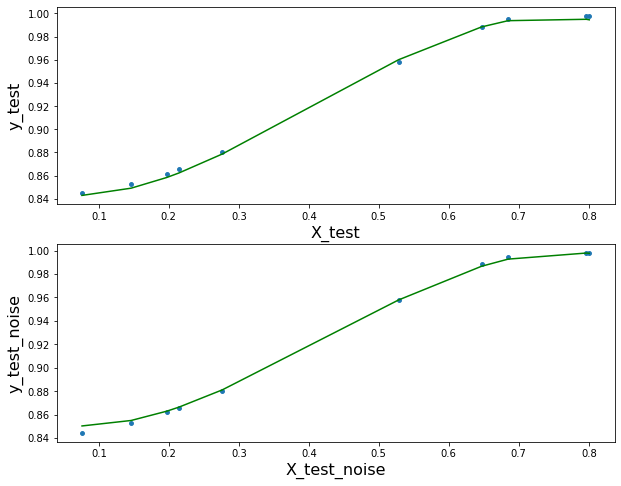

Text(0.5, 0.98, 'Plotting Test and Train with Best Fit Polynomial Curve of Degree 3')

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))

plt.subplot(2, 1,1)
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test_pred ,color='yellow',marker='+')
plt.xlabel("X_test")
plt.ylabel("y_test")


plt.subplot(2,1,2)
plt.scatter(X_test_noise, y_test_noise)
plt.scatter(X_test_noise, y_test_noise_pred, color='black',marker='+')
plt.xlabel("X_test_noise")
plt.ylabel("y_test_noise")

fig.suptitle("Plotting Test and Train with Best Fit Polynomial Curve of Degree 3")
plt.show()